#                                **FBI Data Analysis Project**
* This project aims in harnessing the power of Data analytics to predict crime pattern and improve public safety

### Import of libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from matplotlib.colors import ListedColormap
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df=pd.read_excel("gdrive/My Drive/Project_1/Train.xlsx",engine="openpyxl")

In [5]:
df.head()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,NaN,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12


### Data Exploration
* Involves checking the shape of the data
* Getting to know the data types
* Missing values
* Outliers

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474564 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


In [7]:
## Shape of the data frame
print("Shape of Data frame",df.shape)
## Find missing values for each column
print("\nTotal Missing Values:\n",df.isnull().sum().sum())
print("\nTotal number of Missing Values:\n",df.isnull().sum())

Shape of Data frame (474565, 13)

Total Missing Values:
 150235

Total number of Missing Values:
 TYPE                 1
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64


In [8]:
# checking for missing values and checking the percentage of missing values in detail
for i in df.columns:
  missing_values = df[i].isnull().sum()
  total_values = df[i].count()
  print(f"Data type {i}:{df[i].dtype}")
  print(f"Total values in {i} column :{total_values}")
  print(f"missing values:{missing_values}")
  print(f"Percentage of missing values in {i}:{(missing_values/(total_values+missing_values))*100:.2f}%")
  print("-" * 20)

Data type TYPE:object
Total values in TYPE column :474564
missing values:1
Percentage of missing values in TYPE:0.00%
--------------------
Data type HUNDRED_BLOCK:object
Total values in HUNDRED_BLOCK column :474552
missing values:13
Percentage of missing values in HUNDRED_BLOCK:0.00%
--------------------
Data type NEIGHBOURHOOD:object
Total values in NEIGHBOURHOOD column :423074
missing values:51491
Percentage of missing values in NEIGHBOURHOOD:10.85%
--------------------
Data type X:float64
Total values in X column :474565
missing values:0
Percentage of missing values in X:0.00%
--------------------
Data type Y:float64
Total values in Y column :474565
missing values:0
Percentage of missing values in Y:0.00%
--------------------
Data type Latitude:float64
Total values in Latitude column :474565
missing values:0
Percentage of missing values in Latitude:0.00%
--------------------
Data type Longitude:float64
Total values in Longitude column :474565
missing values:0
Percentage of missing v

### Data cleaning
* Handling missing values
* Missing Data is handled using polynomial interpolation-Type-object->mode and for Type ->Int or float
* Checking for outliers and handling them

In [9]:
# Fill missing values for numerical columns with the mean.
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    df[column]=df[column].interpolate(method='polynomial',order=2)

# Handling missing values for categorical values
for column in df.columns:
  if df[column].dtype=='object':
    df[column]=df[column].fillna(df[column].mode()[0])

# Check if there are still missing values.
print(df.isnull().sum())

TYPE             0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
HOUR             0
MINUTE           0
YEAR             0
MONTH            0
DAY              0
Date             0
dtype: int64


#### Removal outliers in the Numerical data

In [ ]:
print(f"Shape of the data before removing the outliers:{df.shape}")
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
    df=df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
print(f"Shape of the data after removing the outliers:{df.shape}")

Shape of the data before removing the outliers:(474565, 13)
Shape of the data after removing the outliers:(422821, 13)


#### check for the categories in each categorical column with frequencies of each category

In [ ]:
# Iterate through categorical columns
for column in df.select_dtypes(include=['object']).columns:
  # Calculate the frequency of each category
  category_counts = df[column].value_counts()
  print(category_counts)
  print("-" * 20)

TYPE
Theft from Vehicle                                      153136
Mischief                                                 62877
Break and Enter Residential/Other                        56043
Other Theft                                              43491
Theft of Vehicle                                         35992
Break and Enter Commercial                               29898
Theft of Bicycle                                         21975
Vehicle Collision or Pedestrian Struck (with Injury)     19409
Name: count, dtype: int64
--------------------
HUNDRED_BLOCK
7XX GRANVILLE ST                 4148
6XX GRANVILLE ST                 2876
7XX W GEORGIA ST                 2141
X NK_LOC ST                      2113
6XX W 41ST AVE                   1686
                                 ... 
E 40TH AVE / PRINCE EDWARD ST       1
E 49TH AVE / BUTLER ST              1
E 49TH AVE / FLEMING ST             1
E KENT N AVE / ONTARIO ST           1
FRANKLIN ST / VERNON DR             1
Name: count,

* From the above summary of frequency of the categorical column can observe that the "hundred Block " column has categories with less frequency
* So when checking for outliers in this column most of the categories fall under less than 1% frequency .
* Hence removal of ouliers is not prefered in this data

In [ ]:
# HUNDRED_BLOCK category

# Iterate through categorical columns
for column in df.select_dtypes(include=['object']).columns:
  # Calculate the frequency of each category
  categories_count = df[column].value_counts()
  # Filter the categories with the frequency less than 10
  rare_categories = categories_count[categories_count < 10]
  if not rare_categories.empty:
    print(rare_categories)
    print("-" * 20)


HUNDRED_BLOCK
33XX W 53RD AVE                  9
33XX W 5TH AVE                   9
41XX ST CATHERINES ST            9
1X E 19TH AVE                    9
CAMBIE ST / W 29TH AVE           9
                                ..
E 40TH AVE / PRINCE EDWARD ST    1
E 49TH AVE / BUTLER ST           1
E 49TH AVE / FLEMING ST          1
E KENT N AVE / ONTARIO ST        1
FRANKLIN ST / VERNON DR          1
Name: count, Length: 12393, dtype: int64
--------------------


In [ ]:
#check the data is of correct data types
df.dtypes

,0
TYPE,object
HUNDRED_BLOCK,object
NEIGHBOURHOOD,object
X,float64
Y,float64
Latitude,float64
Longitude,float64
HOUR,float64
MINUTE,float64
YEAR,int64


## Data Analysis

### Correlation Plot

                  X         Y  Latitude  Longitude      HOUR    MINUTE  \
X          1.000000 -0.171283 -0.169855   0.999999  0.000349  0.018488   
Y         -0.171283  1.000000  0.999999  -0.172530 -0.017538  0.045346   
Latitude  -0.169855  0.999999  1.000000  -0.171102 -0.017547  0.045396   
Longitude  0.999999 -0.172530 -0.171102   1.000000  0.000368  0.018427   
HOUR       0.000349 -0.017538 -0.017547   0.000368  1.000000 -0.048290   
MINUTE     0.018488  0.045346  0.045396   0.018427 -0.048290  1.000000   
YEAR       0.003863  0.022644  0.022662   0.003839 -0.011019  0.057343   
MONTH      0.008109  0.001086  0.001097   0.008107  0.000181 -0.003083   
DAY        0.001331 -0.003868 -0.003867   0.001336  0.004958  0.004902   

               YEAR     MONTH       DAY  
X          0.003863  0.008109  0.001331  
Y          0.022644  0.001086 -0.003868  
Latitude   0.022662  0.001097 -0.003867  
Longitude  0.003839  0.008107  0.001336  
HOUR      -0.011019  0.000181  0.004958  
MINUTE 

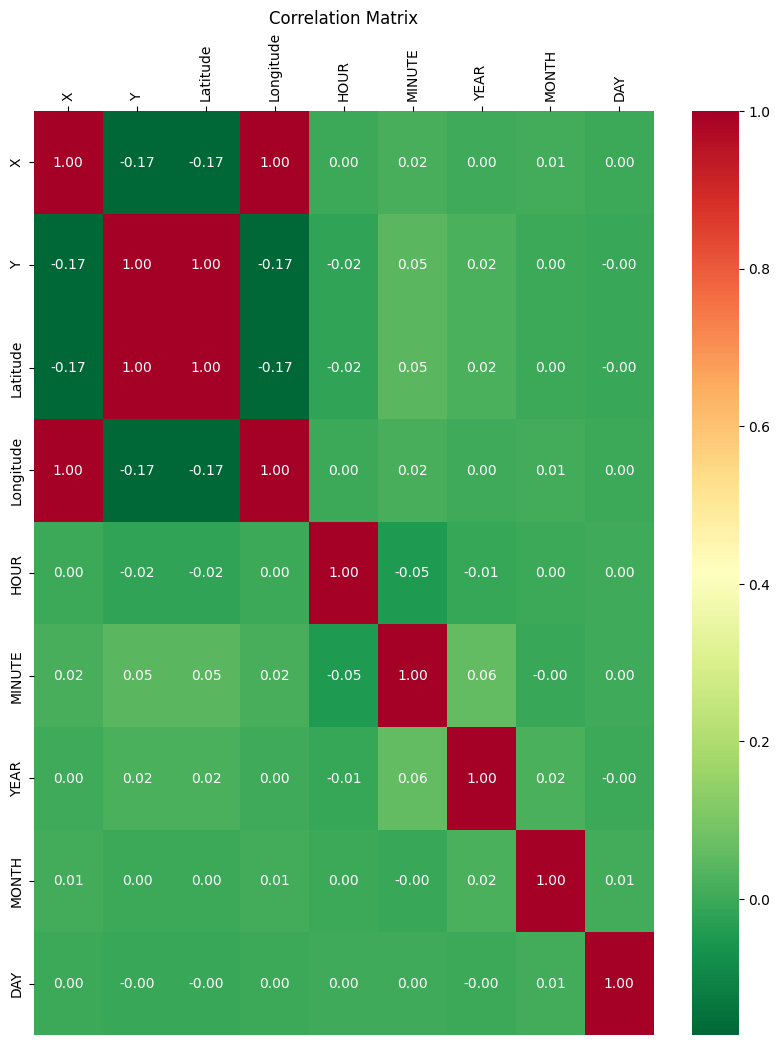

In [ ]:
# Corrlation matrix
numeric_columns=df.select_dtypes(include=['float64','int64']).columns
cor_matrix=df[numeric_columns].corr()
print(cor_matrix)

#Plot the correlation matrix
plt.figure(figsize=(10,12))
sns.heatmap(cor_matrix,annot=True,cmap='RdYlGn_r',fmt=".2f")
# Set x-axis labels at the top
plt.gca().xaxis.set_ticks_position('top')
plt.xticks(rotation=90)
plt.title('Correlation Matrix')
plt.show()

* Column 'X' and 'Longitude' ,'y' and 'latitude' are highly correlated
* Dropping X or Longitude and Y or Latitude during featuring engineering would help in reduction of the columns.

### Distribution of crime types using Horizontal bar chart

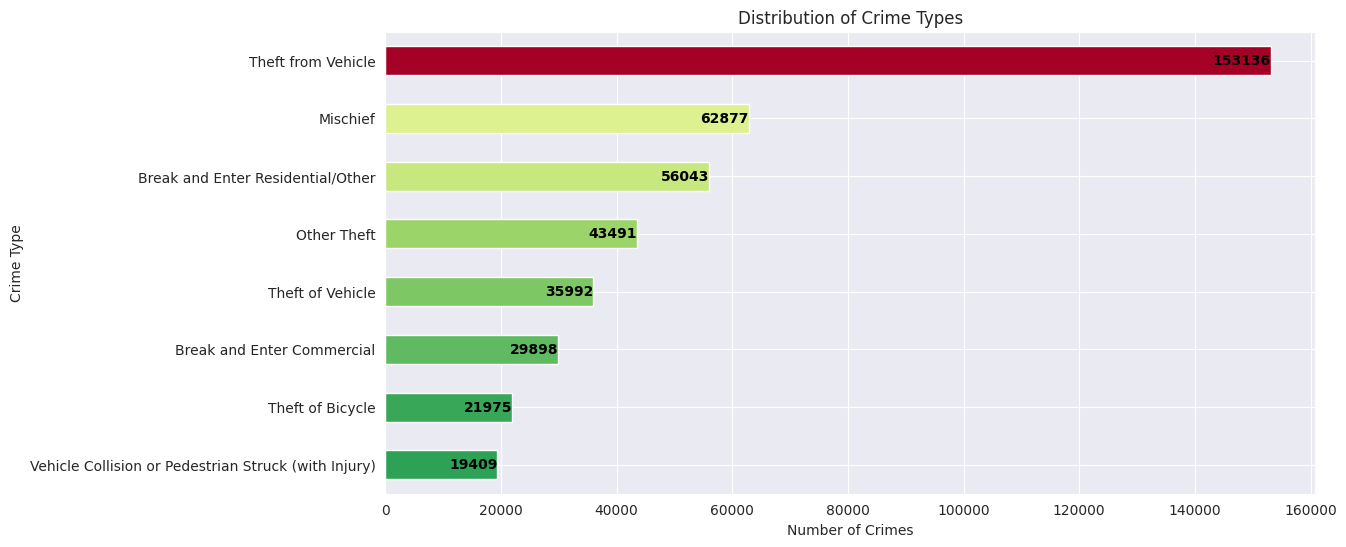

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Horizontal bar chart
crime_counts = df['TYPE'].value_counts().sort_values(ascending=True)
# Colour palette based on crime counts .Red for higher crime count and green for lower crime count
# Normalize the crime count
norm=plt.Normalize(vmin=crime_counts.min(),vmax=crime_counts.max())
colors=plt.cm.RdYlGn_r(crime_counts/max(crime_counts))
# Horizontal bar chart
plt.figure(figsize=(12, 6))
bars=crime_counts.plot(kind='barh',color=colors)

# Adding annotations for the numbers
for i in range(len(crime_counts)):
    bars.text(
        crime_counts.iloc[i] + 5,  # Position the text a bit to the right of the bar
        i,  # Y-position of the bar
        str(crime_counts.iloc[i]),  # The value to display
        va='center',  # Vertical alignment
        ha='right',  # Horizontal alignment
        color='black',  # Text color
        fontweight='bold'  # Text font weight
    )

# Title and labels
plt.title('Distribution of Crime Types')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()

* The chart visualises the frequency of different crime types where red is the highest frequency of crime and green lower frequency.
* "Theft from vehicle" represents the most prevalent crime category.
* The high incidence of  theft from vehicle suggests the potential effectiveness of implementing enhanced vehicle security measures, such as integrated security systems with automated alerts to law enforcement upon breaches.
* Additionally, increasing the density of surveillance cameras in roadways and public areas could provide valuable data for crime prevention and response.
* The combined deployment of these strategies could contribute to a reduction in the frequency of theft from vehicle.


### Crime trend plot year wise

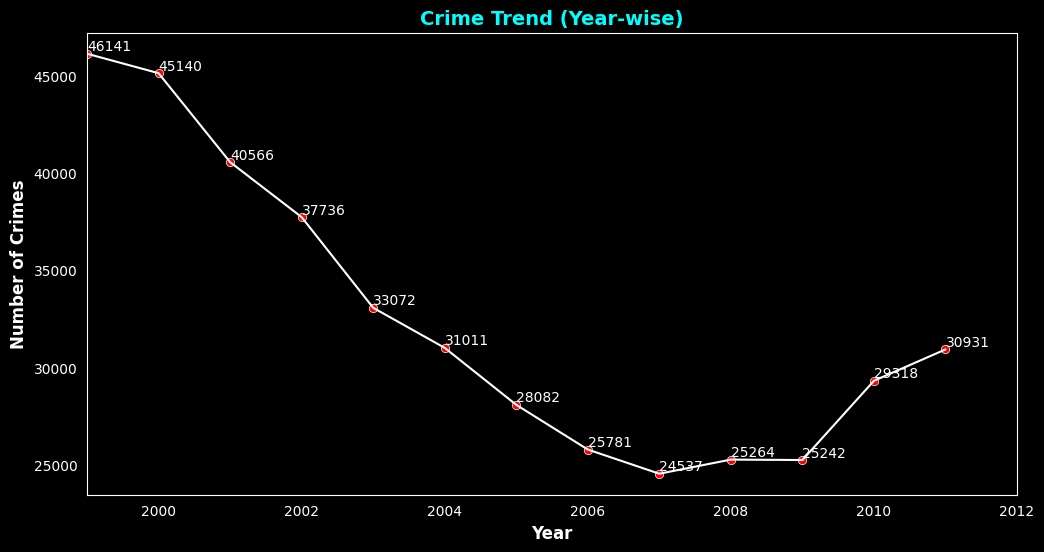

In [ ]:

# Group data by year and count the number of crimes
crime_trend_year = df.groupby('YEAR').size().reset_index(name='TYPE')

# set background to dark
plt.style.use("dark_background")

# Create a line plot to show the trend
plt.figure(figsize=(12, 6))
plt.grid(False)
# Scatter plot to mark points
sns.scatterplot(x="YEAR", y="TYPE", data=crime_trend_year, color="red")
sns.lineplot(x='YEAR',y='TYPE',data=crime_trend_year,color='white')

# Adding annotations for the numbers (crime counts or values)
for i in range(len(crime_trend_year)):
    plt.text(
        crime_trend_year['YEAR'].iloc[i],  # X-position of the text (Year)
        crime_trend_year['TYPE'].iloc[i],  # Y-position of the text (Type or count)
        str(crime_trend_year['TYPE'].iloc[i]),  # The value to display
        ha='left',  # Horizontal alignment to the right of the point
        va='bottom',  # Vertical alignment just below the point
        fontsize=10  # Optional: adjust the font size
    )
# Customize plot
plt.xlabel("Year", fontsize=12,fontweight='bold')
plt.ylabel("Number of Crimes", fontsize=12,fontweight='bold')
plt.title("Crime Trend (Year-wise)", fontsize=14,color='cyan',fontweight='bold')

# Change x-axis limits
plt.xlim(crime_trend_year["YEAR"].min(), crime_trend_year["YEAR"].max() + 1)

plt.show()




* The plot indicates a decreasing trend in the crime rate after 2001, following a period of higher crime rates in preceding years.
* During the period between 2005 - 2009, the crime rate exhibited a relatively lower frequency, followed by a subsequent increase.
* But after 2009 there is slightly increasing trend
* The observed reduction in the crime rate can potentially be attributed to implemented crime prevention measures and increased public awareness campaigns.


### Crime analysis with respect to time(hour)

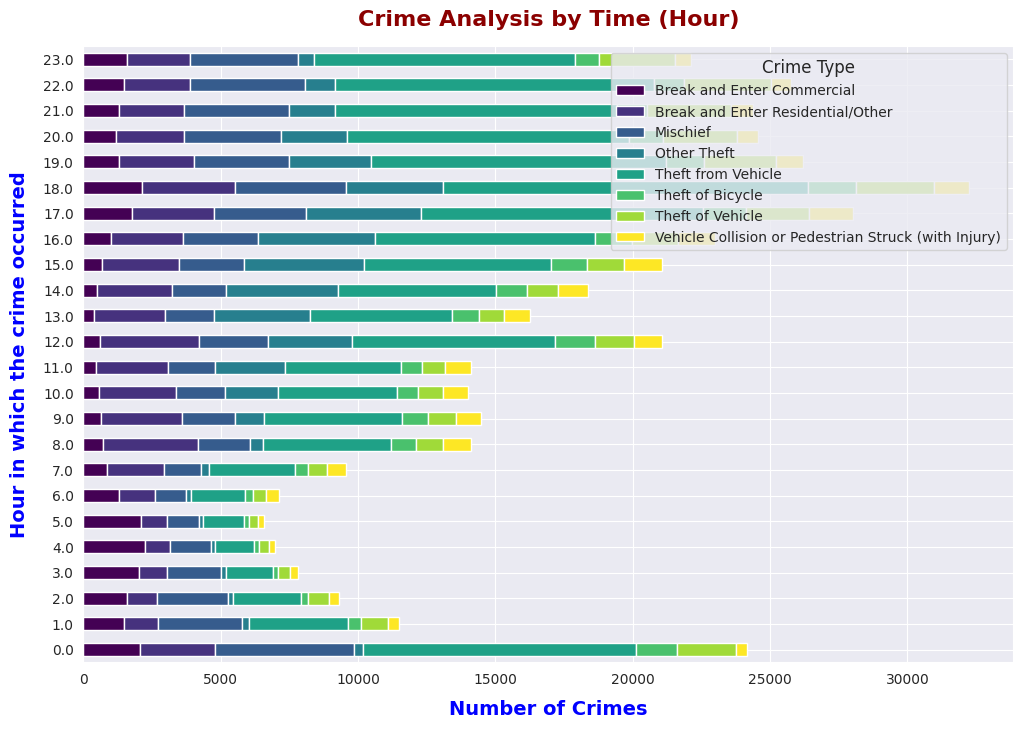

In [ ]:
# Group data by time (hours) by the crime type
crime_type_time=df.groupby('HOUR')['TYPE'].value_counts().unstack()
sns.set_style("darkgrid")
# Horizontal stacked bar plot
ax=crime_type_time.plot(kind='barh',stacked=True,figsize=(12, 8),colormap='viridis')

#Customize labels and title
ax.set_xlabel("Number of Crimes", fontsize=14, fontweight='bold', labelpad=10, color='blue')
ax.set_ylabel("Hour in which the crime occurred", fontsize=14, fontweight='bold', labelpad=10, color='blue')
ax.set_title("Crime Analysis by Time (Hour)", fontsize=16, fontweight='bold', pad=15, color='darkred')

# Customize legend
ax.legend(title='Crime Type', title_fontsize=12, fontsize=10, loc='upper right')

plt.show()

### In-depth crime analysis during the day and night time

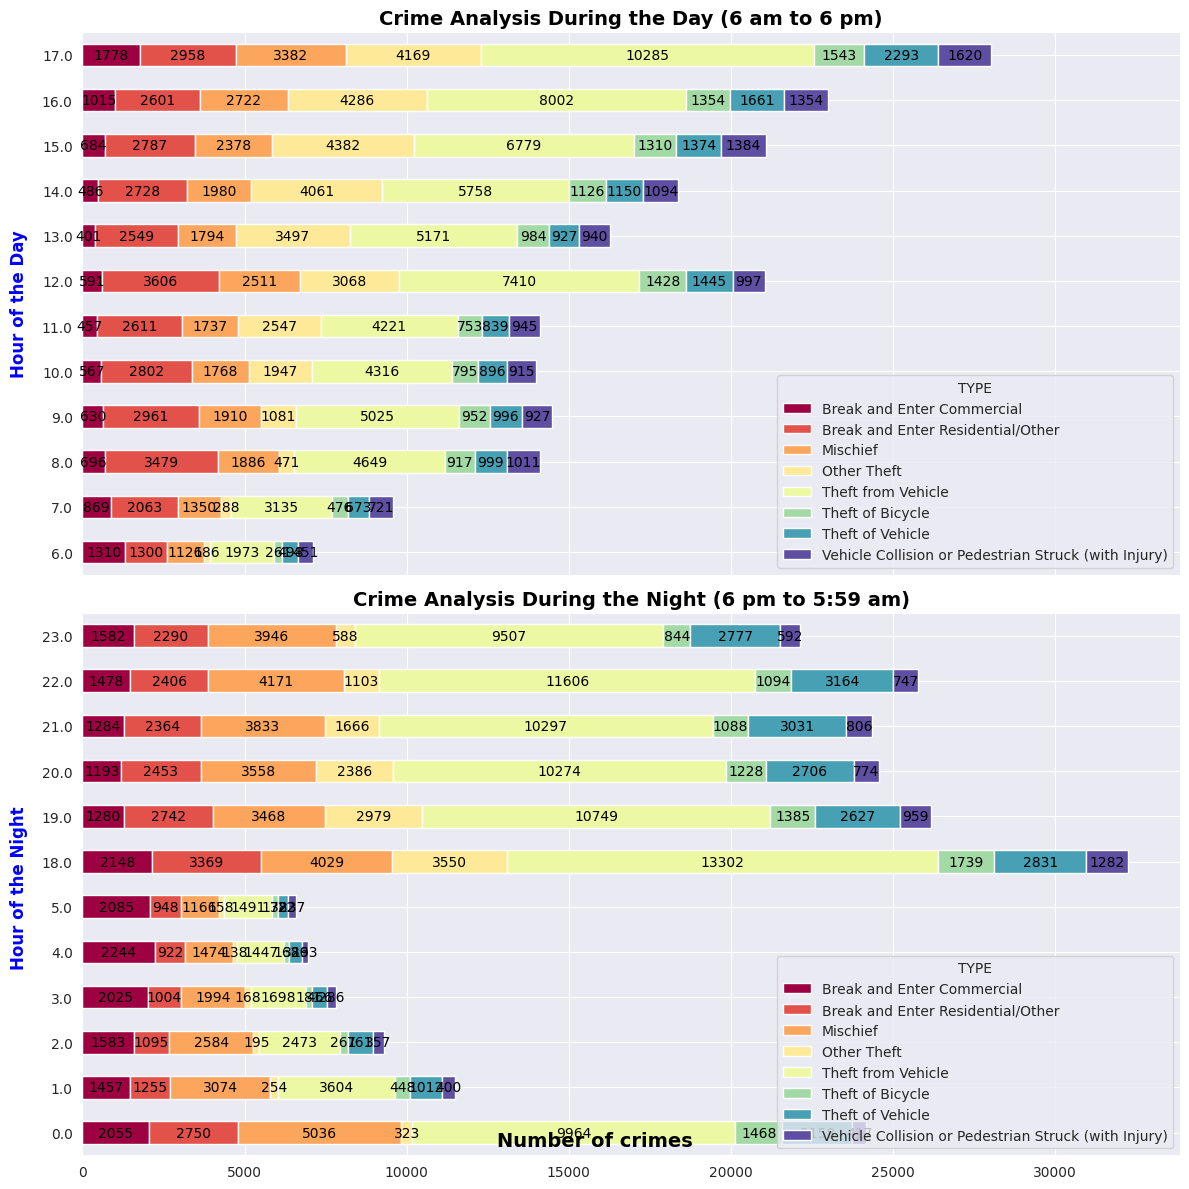

In [ ]:
from matplotlib.colors import ListedColormap

# Function to categorize time into day-night
def time_category(hour):
  if  6 <= hour <18:
    return 'Day'
  else:
    return 'Night'
# create new column
df['Day_Night']=df['HOUR'].apply(time_category)

# Group data by Day/Night and crime type
crime_time=df.groupby(['Day_Night','HOUR'])['TYPE'].value_counts().unstack()

# Set dark background
sns.set_style("darkgrid")

# Create seperate plots for day and night
fig,axes=plt.subplots(2,1,figsize=(12,12),sharex=True)

# Plot for Daytime crimes
day=crime_time.loc['Day'].plot(kind='barh',stacked=True,ax=axes[0],colormap='Spectral')
axes[0].set_title("Crime Analysis During the Day (6 am to 6 pm)",fontsize=14,fontweight='bold',color='Black')
axes[0].set_ylabel("Hour of the Day", fontsize=12,fontweight='bold',labelpad=10,color='blue')

# Adding annotations
for bar in day.containers:
    axes[0].bar_label(bar, fmt='%.0f', label_type='center', color='black', fontsize=10)

#plot for nighttime crimes
night=crime_time.loc['Night'].plot(kind='barh',stacked=True,ax=axes[1],colormap='Spectral')
axes[1].set_title("Crime Analysis During the Night (6 pm to 5:59 am)",fontsize=14,fontweight='bold',color='Black')
axes[1].set_ylabel("Hour of the Night ",fontsize=12,fontweight='bold',labelpad=10,color='blue')

# Adding annotations
for bar in night.containers:
    axes[1].bar_label(bar, fmt='%.0f', label_type='center', color='black', fontsize=10)

# commaon x-axis label
fig.text(0.5,0.04,"Number of crimes",ha='center',fontsize=14,fontweight='bold',color='black')
plt.tight_layout()
plt.show()


* Crime frequency during the day shows an increasing trend starting from 12 PM (noon).
* Crime rates are generally lower during the early morning hours and gradually increase towards the noon.

* During the night, the crime rate peaks around 6 PM (18.0) and then starts decreasing, with a significant increase observed around 12 AM (midnight).

* Predominance of Theft from Vehicle:consistently high rate of theft from vehicle incidents suggests potential vulnerabilities in vehicle security measures, parking practices, or public awareness campaigns.

### Investigate the crimes by days of the week

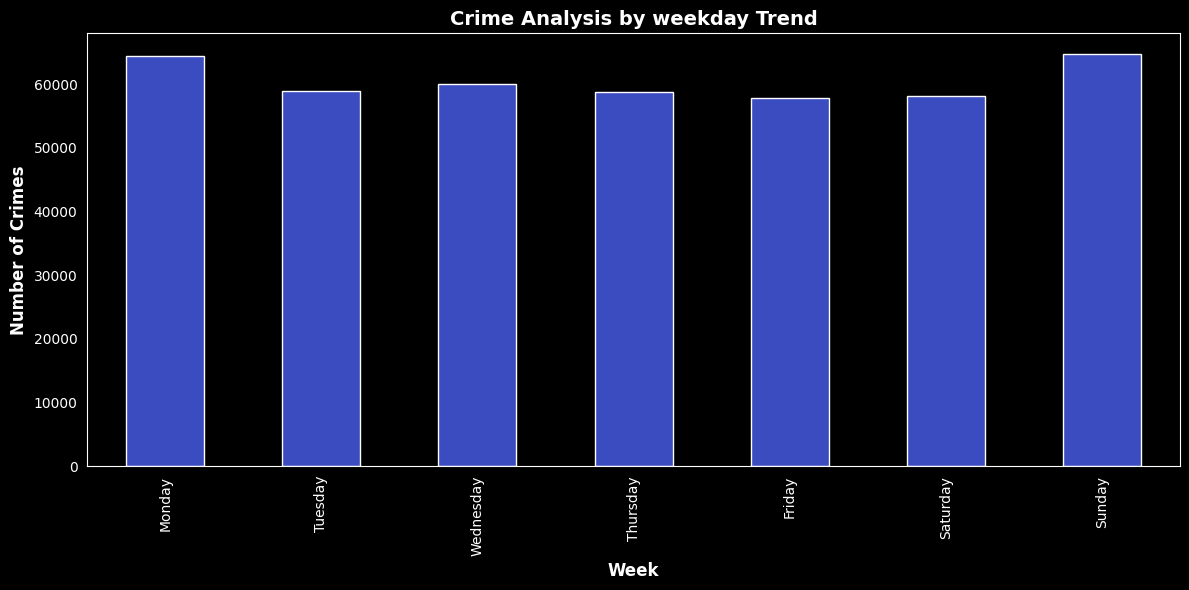

In [ ]:
# crime type with weeday
df['DayOfWeek'] = df['Date'].dt.day_name()
# Group data by crime type and weekday
# set background to dark
plt.style.use("dark_background")

plt.figure(figsize=(12, 6))
df.groupby(df['DayOfWeek'])['TYPE'].count().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar',colormap='coolwarm')
plt.title('Crime Analysis by weekday Trend',fontsize=14,fontweight='bold',color='white')
plt.xlabel('Week',fontsize=12,fontweight='bold',color='white')
plt.ylabel('Number of Crimes',fontsize=12,fontweight='bold',color='white')
plt.grid(False)
plt.tight_layout()
plt.show()

* Analysis of crime data reveals a statistically significant increase in the number of reported crimes on Mondays and Sundays when compared to the other days of the week.

### Deeper analysis of the above plot splitting with time(Day-Night)

<Figure size 1500x1400 with 0 Axes>

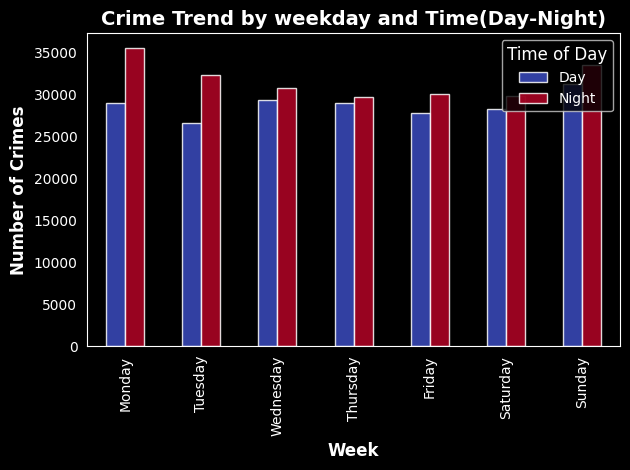

In [ ]:

# Group data by Day/Night and week day by crime count
crime_time_weekday=df.groupby(['DayOfWeek', 'Day_Night'])['TYPE'].count().unstack()

# set background to dark
plt.style.use("dark_background")

plt.figure(figsize=(15,14))
# Create a stacked bar plot
crime_time_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(
    kind='bar',stacked=False,colormap='coolwarm',alpha=0.85)
plt.title('Crime Trend by weekday and Time(Day-Night)',fontsize=14,fontweight='bold',color='white')
plt.xlabel('Week',fontsize=12,fontweight='bold',color='white')
plt.ylabel('Number of Crimes',fontsize=12,fontweight='bold',color='white')

# Add legend
plt.legend(title="Time of Day", fontsize=10, title_fontsize=12,loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()

* Compared to the daytime, the number of crimes committed during the night is significantly higher.


### Analysis of Crime Rates by Neighborhood

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


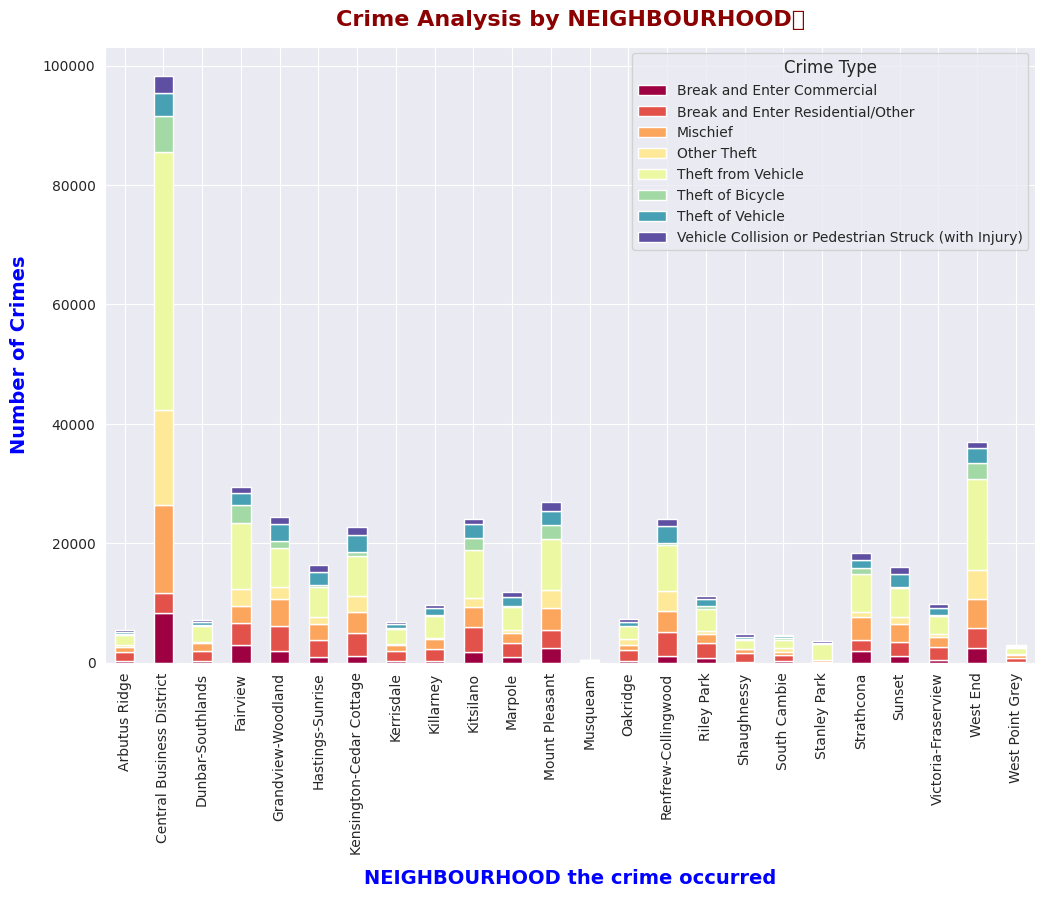

In [ ]:
# Group data by time (hours) by the crime type
crime_type_time=df.groupby('NEIGHBOURHOOD')['TYPE'].value_counts().unstack()
sns.set_style("darkgrid")
# Horizontal stacked bar plot
ax=crime_type_time.plot(kind='bar',stacked=True,figsize=(12, 8),colormap='Spectral')

#Customize labels and title
ax.set_ylabel("Number of Crimes", fontsize=14, fontweight='bold', labelpad=10, color='blue')
ax.set_xlabel("NEIGHBOURHOOD the crime occurred", fontsize=14, fontweight='bold', labelpad=10, color='blue')
ax.set_title("Crime Analysis by NEIGHBOURHOOD	", fontsize=16, fontweight='bold', pad=15, color='darkred')

# Customize legend
ax.legend(title='Crime Type', title_fontsize=12, fontsize=10, loc='upper right')

plt.show()


**Analysis of Crime Rates by Neighborhood**

* The analysis of crime data indicates that the Central Business District exhibits the highest crime rate among all other neighborhoods, while Musqueam displays the lowest crime rate.
* This deifference could be due to population density,presence of business ,the location
* Increase in safety measures in "Central Business District " could reduce the crime rate

In [ ]:
df.head()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date,Day_Night,DayOfWeek
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12,Day,Wednesday
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07,Day,Friday
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23,Day,Friday
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20,Day,Tuesday
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12,Day,Monday


### Crime Investigation Based on Geographical Location Analysis

In [ ]:
import folium
from folium.plugins import MarkerCluster
from google.colab import output
from IPython.display import display, HTML

# sample of the data is taken for visualising in map
sampled_df = df.sample(10000)
# Create a map centered on the average latitude and longitude of your data
map_center=[df['Latitude'].mean(),df['Longitude'].mean()]

# Create a folium map
map=folium.Map(location=map_center,zoom_start=10)

# Marker cluster
marker_cluster=MarkerCluster().add_to(map)

# Add crime locations as clustered markers
for i,row in df.iterrows():
  folium.Marker(
      location=[row['Latitude'],row['Longitude']],
      popup=f"Crime Type: {row['TYPE']}<br>Date: {row['Date']}",
      icon=folium.Icon(color='red',icon='info-sign')
  ).add_to(map)

output.clear()  # Clear any previous output
# Get the HTML representation of the map
map_html = crime_map._repr_html_()

# Create custom HTML with size controls (adjust width and height)
custom_html = f"""
<div style="width: 100%; height: 600px;">
    {map_html}
</div>
"""

# Display map directly in Google Colab
display(HTML(custom_html))


* The longitude and latitude coordinates correspond to regions within British Columbia, Canada, specifically within the Greater Vancouver area.
* This map provides a spatial analysis of crime incidents, displaying the crime type and the date of occurrence at specific geographic locations (latitude, longitude).

### Analysis of crime distribution across neighborhoods

In [ ]:
import folium
from folium.plugins import MarkerCluster
from google.colab import output
from IPython.core.display import display, HTML

# Group crimes by neighborhood and calculate average latitude and longitude
neighborhood_crime = df.groupby('NEIGHBOURHOOD').agg({
    'Latitude': 'mean',
    'Longitude': 'mean',
    'TYPE': 'count'  # Count number of crimes per neighborhood
}).reset_index()

# Set map center based on the average latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]

# Create a folium map
crime_map = folium.Map(location=map_center, zoom_start=10)

# Add a Marker Cluster
marker_cluster = MarkerCluster().add_to(crime_map)

# Add neighborhood markers
for _, row in neighborhood_crime.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Neighborhood: {row['NEIGHBOURHOOD']}<br>Number of Crimes: {row['TYPE']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Clear previous output
output.clear()

# Get the HTML representation of the map
map_html = crime_map._repr_html_()

# Create custom HTML with fixed size
custom_html = f"""
<div style="width: 100%; height: 600px;">
    {map_html}
</div>
"""

# Display map directly in Google Colab
display(HTML(custom_html))


* This map enables a spatial analysis of crime distribution across neighborhoods, providing insights into the frequency and density of criminal activities in different regions.
* By visualizing the crime count per neighborhood, it enables the identification of high-crime areas.
* This enables law enforcement agencies to implement proactive safety measures, optimize resource allocation, and develop effective crime prevention strategies, while also raising public awareness of crime-prone areas, ultimately enhancing community security and safety.

* The project report provides detailed description of the project